In [1]:
# based on https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb

In [2]:
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
import fastai
fastai.__version__

'1.0.60.dev0'

In [5]:
bs = 64

In [6]:
path = untar_data(URLs.PETS);

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
pat = r'/([^/]+)_\d+.jpg$'

In [9]:
fnames = get_image_files(path_img)

In [10]:
data = ImageDataBunch.from_name_re(
    path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
).normalize(imagenet_stats)

In [11]:
data.path = Path('../')

In [12]:
data.export('empty_db.pkl')

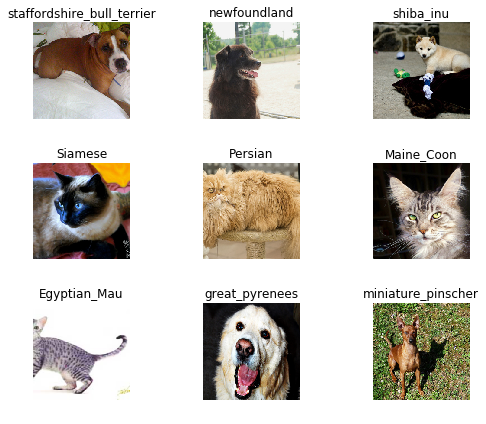

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [14]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [20]:
learn = cnn_learner(data, models.densenet121, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/radek/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:03<00:00, 9.83MB/s]


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.164618,0.309972,0.102165,00:37
1,0.538173,0.228453,0.073072,00:33
2,0.305363,0.184540,0.060893,00:34
3,0.199613,0.164810,0.055480,00:33


In [24]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.164016,0.159659,0.052774,00:45
1,0.148727,0.158957,0.052774,00:42


In [25]:
learn.path = Path('../')

In [26]:
learn.save('pets')